# Klasteryzacja

In [1]:
import pandas as pd
import nltk
import string
import re
import operator
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from collections import Counter


from sklearn.metrics.pairwise import cosine_similarity

#Data Visualization
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
#cmap possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r


pd.set_option('display.max_colwidth', 100)

F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Wczytywanie danych tekstowych

In [2]:
df = pd.read_csv('../CSV/df_eng_gospel.csv', header=0, index_col=0)
dfs = pd.read_csv('../CSV/df_eng_songs.csv', header=0, index_col=0)
dfs.head()

,Tytuł,Tekst,Eng
0,Abba Ojcze,"Ty wyzwoliłeś nas Panie z kajdan i samych siebie, a Chrystus stając się bratem nauczył nas wo...","You delivered us from chains and ourselves, and Christ, by becoming a brother, taught us to call..."
1,Alleluja (Niech zabrzmi Panu),"Alleluja, Alleluja, Alleluja, Alleluja. Niech zabrzmi Panu chwała w niebiosach, na wysokośc...","Alleluia, Alleluia, Alleluia, Alleluia. Let the glory of the heavens be heard in the heavens, le..."
2,"Alleluja, Alleluja, Amen Amen, Alleluja","Alleluja, Alleluja, Amen, Amen, Alleluja. Pokłońmy się przed Nim – On naszym Panem jest Po...","Alleluia, Alleluia, Amen, Amen, Alleluia. Let us bow before Him - He is our Lord, let us bow bef..."
3,"Blisko, blisko, blisko jesteś","Blisko, blisko, blisko Jesteś Panie mój Blisko tak, że czuję tchnienie Twe I przychodzisz do m...","Close, close, close You are my Lord, Close to me, that I feel my breath and come to me You touch..."
4,Bo góry mogą ustąpić,"Bo góry mogą ustąpić i pagórki się zachwiać. Ale miłość Moja, miłość Moja nigdy nie odstąpi od...","Because the mountains can give way and the hills get swayed. But my love, my love will never dep..."


In [3]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 3 columns):
Tytuł    187 non-null object
Tekst    187 non-null object
Eng      187 non-null object
dtypes: object(3)
memory usage: 5.8+ KB


## Czyszczenie danych

In [4]:
stopwords = nltk.corpus.stopwords.words('english')

def lemmatizing(tokenized_text):
    wn = nltk.WordNetLemmatizer()
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

def stemming(tokenized_text):
    ps = nltk.PorterStemmer()
    text = [ps.stem(word) for word in tokenized_text]
    return text

def clean_text_and_lemmatize(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    tokens = lemmatizing(tokens)
    text = " ".join([word for word in tokens if word not in stopwords])
    return text

def clean_text_and_stem(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    tokens = stemming(tokens)
    text = " ".join([word for word in tokens if word not in stopwords])
    return text

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([word for word in tokens if word not in stopwords])
    return text

def clean_text_and_tokenize(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

In [5]:
text = dfs['Eng'][0]
print(text)

You delivered us from chains and ourselves, and Christ, by becoming a brother, taught us to call to You: Abba, Father! Abba, Father! Abba, Father! For the Church, like the tree of life in eternity, roots, penetrates our everyday life and shows us to You. Abba, Father! Abba, Father! Abba, Father! God is a generous Giver of life, he has freed us from death and, embracing him, he made his children. Abba, Father! Abba, Father! Abba, Father! We are all brothers, we are one family. There is nothing darkening this truth and now is her hour. Abba, Father! Abba, Father! Abba, Father!


In [6]:
cleaned = clean_text(text)
print(cleaned)

delivered us chains christ becoming brother taught us call abba father abba father abba father church like tree life eternity roots penetrates everyday life shows us abba father abba father abba father god generous giver life freed us death embracing made children abba father abba father abba father brothers one family nothing darkening truth hour abba father abba father abba father


#### Bag of words

In [9]:
txt = nltk.word_tokenize(clean_text(text))
bow = Counter(txt)
bow_d = dict(bow.most_common(10))
bow_d

{'abba': 12,
 'father': 12,
 'us': 4,
 'life': 3,
 'delivered': 1,
 'chains': 1,
 'christ': 1,
 'becoming': 1,
 'brother': 1,
 'taught': 1}

In [10]:
#vectorizer = CountVectorizer(ngram_range=(1,1), binary=False, 
                            #analyzer=clean_text_and_tokenize
                           # )
vectorizer = TfidfVectorizer(
    #analyzer=clean_text_and_tokenize
)
vect = vectorizer.fit_transform(dfs['Eng'])
#d = dict(vectorizer.vocabulary_)
terms = vectorizer.get_feature_names()

vect_df = pd.DataFrame(vect.toarray(), columns=terms)
vect_df.head()

,abandoned,abba,abides,able,about,above,abraham,absorb,abundant,abyss,...,x2,years,you,your,yours,yourself,yourselves,youth,zion,zither
0,0.0,0.787052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.053252,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.016286,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.194813,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.085808,0.0,0.0,0.0,0.0,0.0,0.0,0.0


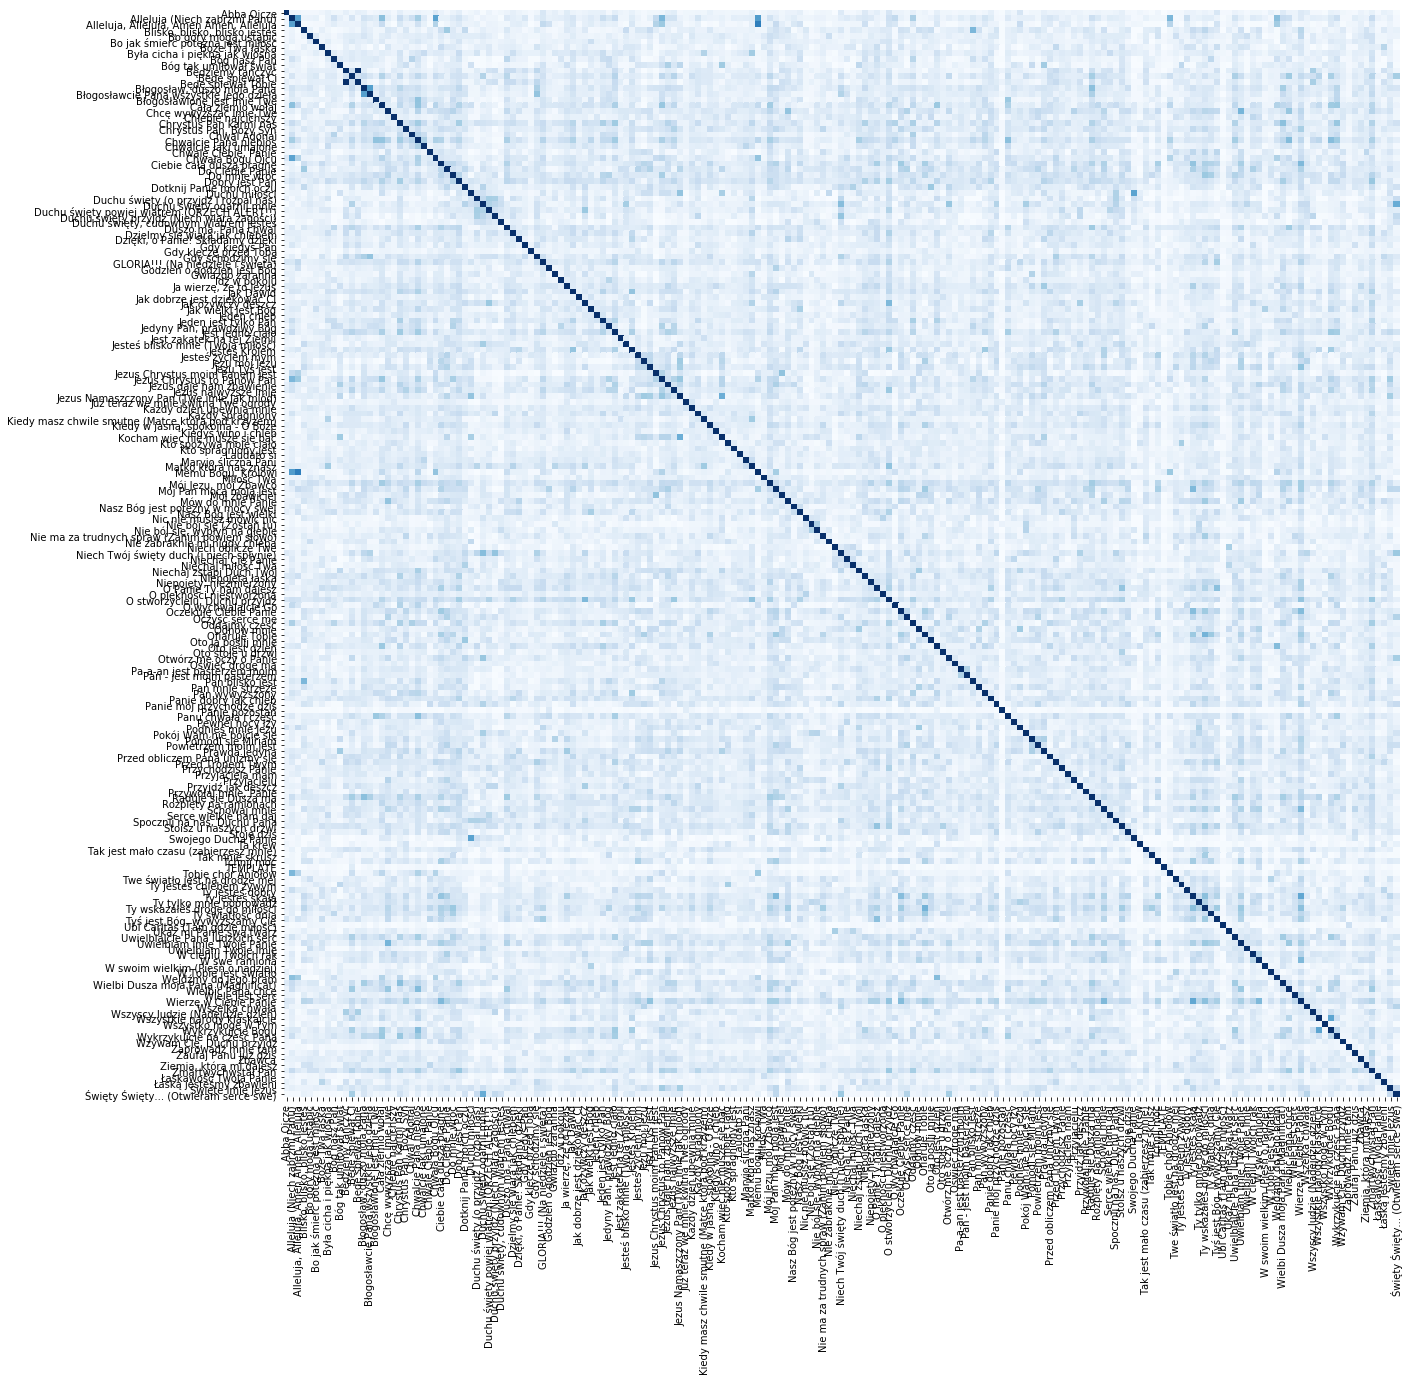

In [11]:
dist = (1 - cosine_similarity(vect_df)).round(2)
plt.figure(figsize=(20,20)) 
sns.heatmap(dist, annot=False, cbar=False,
            cmap='Blues_r',
            xticklabels=dfs['Tytuł'], 
            yticklabels=dfs['Tytuł'])

In [12]:
print(df.loc['2019-01-26']['Ewangelia'])
print()
print(df.loc['2018-10-04']['Ewangelia'])

Then the Lord appointed another seventy-two, and sent them two by two in front of him to every city and town where he intended to come. He also said to them, "The harvest is great, but the laborers are few: ask the Lord of the harvest to send out laborers into his harvest. Go, I send you like sheep among the wolves, carry no purse or bag, no sandals, no one When you come to what house you enter, first say: Peace to this house If there is a man who is worthy of peace, your peace will rest on him, if not he will return to you, stay in the same house, eating and drinking what they have: because he deserves his payment, do not go home from home, if you enter and accept you, eat what they give you, heal the sick who are there, and tell them: The kingdom of God has come closer to you.

Jesus appointed another seventy-two disciples and sent them in front of him to each city and town where he would come. He said to them, "The harvest is great, but the laborers are few: ask the Lord of the harv

In [13]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

     label                                                song
111      0                              Otwórz me oczy o Panie
26       0                            Ciebie całą duszą pragnę
27       0                                     Do Ciebie Panie
149      0                      Twe światło jest na drodze mej
82       0                              Mój Pan mocą moją jest
170      0                               Wierzę w Ciebie Panie
169      0                                     Wiele jest serc
137      0                                        Schowaj mnie
165      0                                W Tobie jest światło
160      0                          Uwielbiam Imię Twoje Panie
84       0                                   Mów do mnie Panie
73       0                       Kocham więc nie muszę się bać
71       0                    Kiedy w jasną, spokojną - O Boże
155      0                                   Ty światłość dnia
141      0                                          Sto

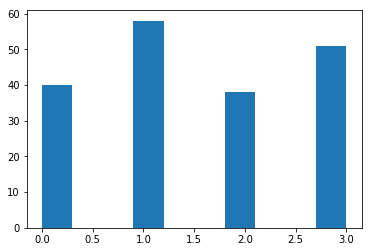

In [14]:
# Fit the pipeline to articles
pipeline.fit(vect)

# Calculate the cluster labels: labels
labels = pipeline.predict(vect)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'song': dfs['Tytuł']})

# Display df sorted by cluster label
print(df.sort_values('label'))
plt.hist(labels)
plt.show()

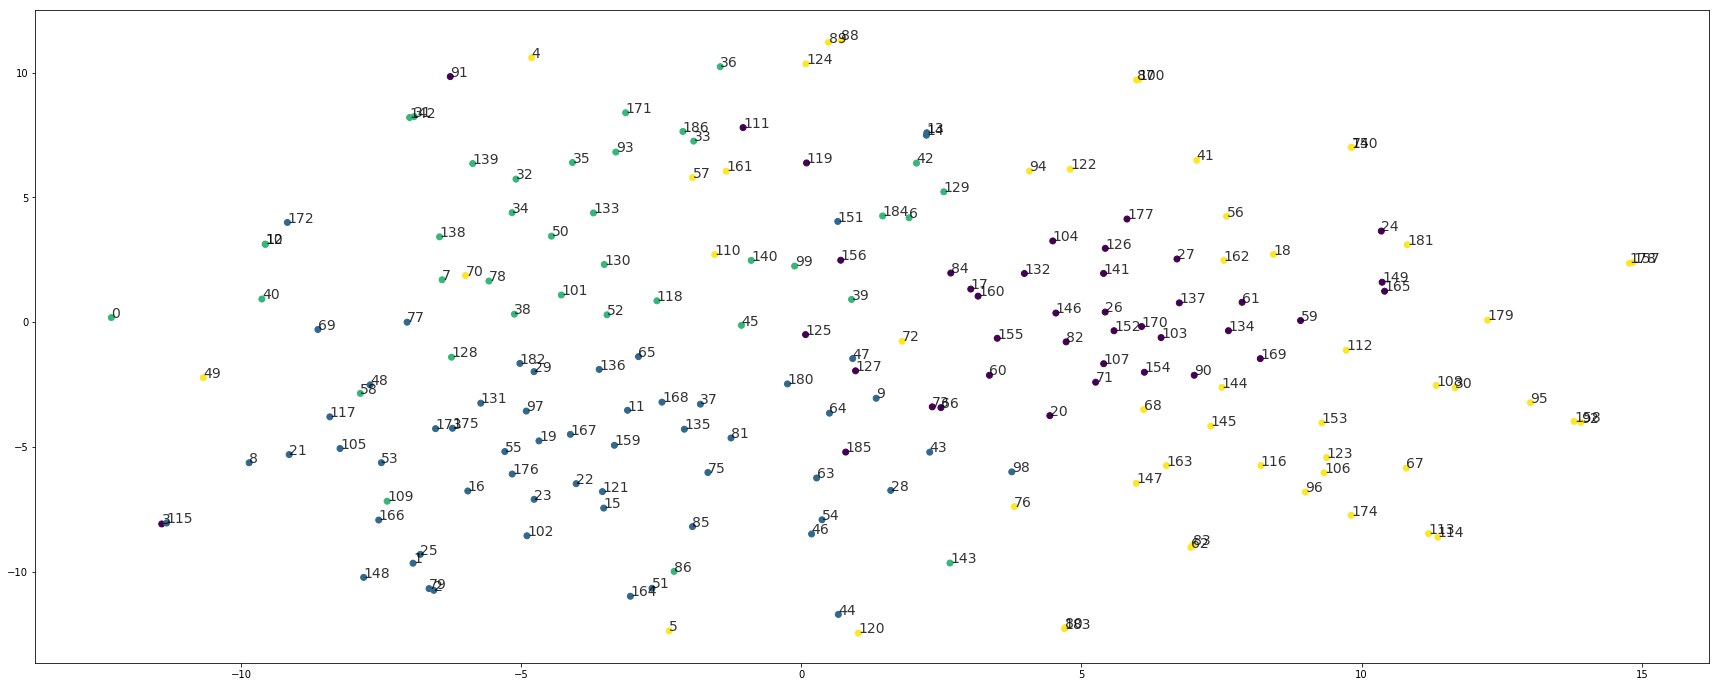

In [15]:
model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(vect.toarray())
# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by clusters
plt.figure(figsize=(30,12))
plt.scatter(xs,ys,c=labels)
for x, y, reading in zip(xs, ys, np.arange(len(dfs))):
    plt.annotate(reading, (x, y), fontsize=14, alpha=0.8)
#plt.legend()# TO FIX
plt.show()

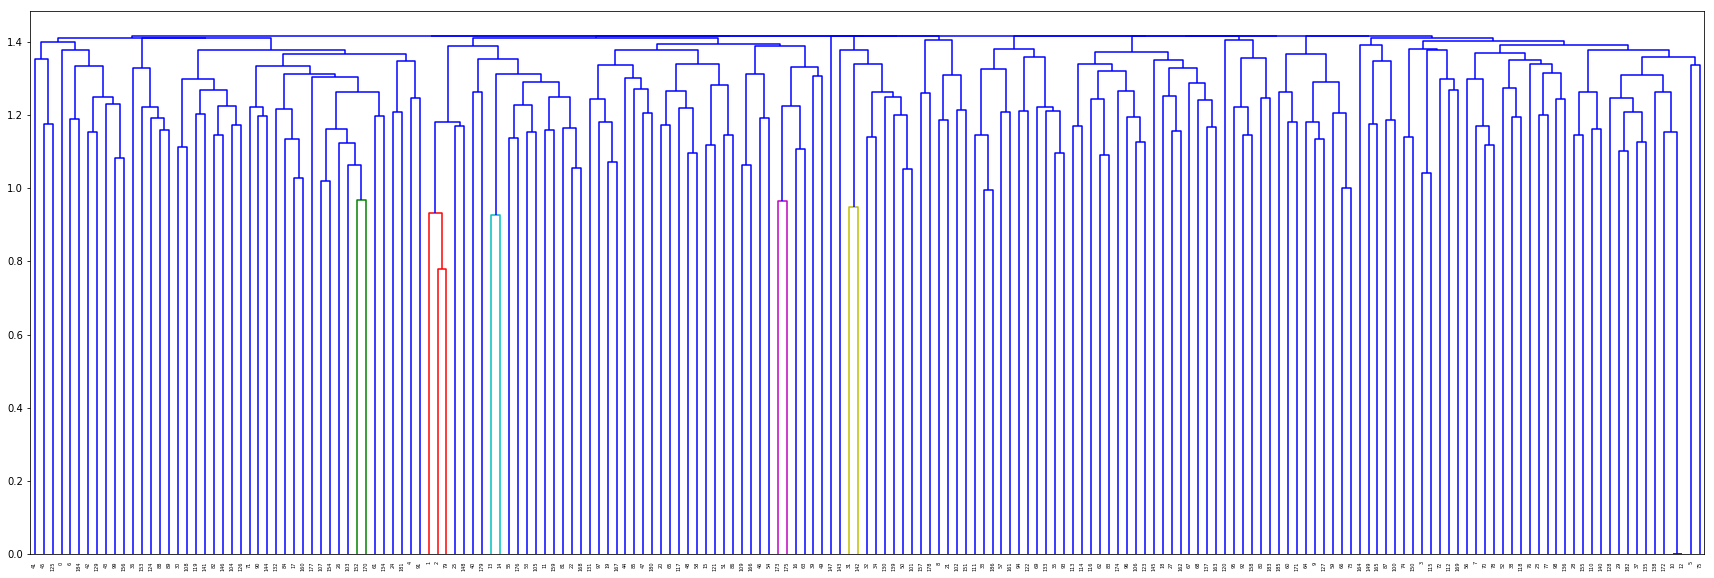

In [16]:
mergings = linkage(vect.toarray(), method='complete')
#print(mergings)
plt.figure(figsize=(30,10))
dendrogram(mergings)
plt.show()

### NMF

In [17]:
# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(vect_df)

# Transform the articles: nmf_features
nmf_features = model.transform(vect_df)

# Print the NMF features
#print(nmf_features)

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=terms)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

components_df.head()

(6, 1382)
me      1.013234
my      0.776845
in      0.204970
to      0.203748
your    0.191889
Name: 3, dtype: float64


,abandoned,abba,abides,able,about,above,abraham,absorb,abundant,abyss,...,x2,years,you,your,yours,yourself,yourselves,youth,zion,zither
0,0.010769,0.006320,0.002314,0.009441,0.008540,0.085765,0.038899,0.000000,0.010769,0.011113,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000844,0.003855,0.022007,0.033171
1,0.000000,0.006558,0.000000,0.002734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005303,1.142731,0.297174,0.049361,0.000000,0.005683,0.000000,0.000000,0.000000
2,0.000401,0.018461,0.000000,0.015773,0.000000,0.000000,0.000000,0.000000,0.000401,0.000772,...,0.003703,0.000000,0.001967,0.271202,0.000000,0.016584,0.002375,0.000000,0.001351,0.000000
3,0.000000,0.000000,0.015669,0.000000,0.041166,0.000000,0.000000,0.030825,0.000000,0.000000,...,0.026378,0.005522,0.015780,0.191889,0.000000,0.056555,0.000000,0.003842,0.000000,0.000000
4,0.000000,0.002608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.020874,0.002744,0.000000,0.016136,0.000000,0.000000,0.002089,0.013893


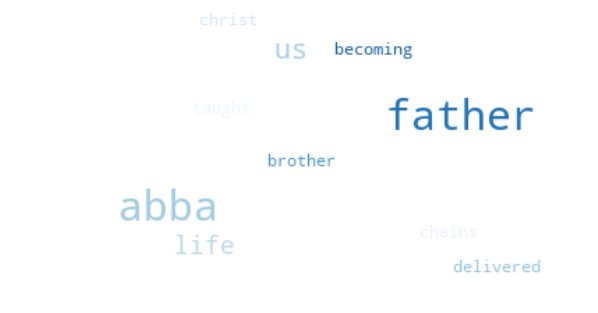

In [18]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stopwords, 
                      max_font_size=30, 
                      max_words=20, 
                      background_color="white", 
                      colormap='Blues' 
                     ).generate_from_frequencies(bow_d)




# Display the generated image:
plt.figure(figsize=(10,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()